START NOTEBOOK

# Model Description

A dissipation model was developed at the microcosm scale to estimate pesticide component dissipation in top-soil, i.e. degradation and leaching during infiltration. Partitioning between rainfall and runoff was determined using the Green-Ampt method (Green and Ampt, 1911; Mein and Larson, 1973). This simplification of the Richards equation (Richards, 1931) simulates overland flow when rainfall intensity overcomes the soil infiltration capacity. The retention and release of pesticide components in the top-soil was conceptualized using a mixing layer model (McGrath et al., 2008; Joyce et al., 2010). This approach assumes linear equilibrium sorption and adapts McGrath et al. (2008) by directly accounting for the leached volume such that:

$$ C(t+t_r) = C(t) \cdot exp\big( \frac{-V_{lch}}{ R~V_{H_2O} } \big) $$

$$ V_{lch} = h_{lch} \pi r^2 $$

$$ V_{H_2O} = \pi \cdot r^2 \cdot zl \cdot \theta_{sat} $$

$$ R = 1 + \frac{\rho_b K_d}{\theta_{sat}} $$

where $C$ is the concentration before $(t)$ and after $(t+ t_r)$ the leaching event, $(h_{lch})~[cm]$ is leached depth, $r~[cm]$ is the microcosm radius, $zl ~[cm]$ is the soil height and $\theta_{sat} ~ [cm^3 cm^{-3}]$ the constant volumetric water content (saturated capacity).



## Experimental set-up 

### Rainfal intensities

In [4]:
intensities = [2.25, 0.92, 0.5]  # mm/min = [0.225, 0.092, 0.05] cm/min

### Microcosm

In [5]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
soil_height1 = 30  # Mixing layer depth in mm

### Soil Characteristics

In [21]:
''' Hydrological controlling parameters'''

porosity_vine = 0.55  # Vinyard soil
kSat_vine = 2.93  # mm/min (17.6 cm/h - Crop Soil) - Rouffach (Martine Trautmann, sampled pre-event)
ov_1 = 0.25   # Initial water content m3. m-3
ov_2 = 0.30   # Initial water content m3. m-3
ovSat_vine = 0.45  # Saturated water content (assumed)
psi_vine = 1100  # soil suction Rouffach (guess) mm

''' Contaminant controlling parameters'''
pb_vine = 1.04/10**3  # bulk density (g/cm^3) -> g/mm^3, Rouffach (Martine Trautmann, sampled pre-event)

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

# Fraction Organic Matter
fom_vine_sterile = 3.53/100.0
fom_vine_untreat = 2.93/100.0

# Fraction Organic Carbon
foc_vine_sterile = 0.58*fom_vine_sterile
foc_vine_untreat = 0.58*fom_vine_untreat



# Results - First Pulse

## Hydrology

In [7]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

# Plot graphs within this document
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

# Plot graphs outside (for interaction)
# %matplotlib

### Hydrology - Vineyard Soil

Mass balance 0.0
Mass balance 0.0
Mass balance 0.0


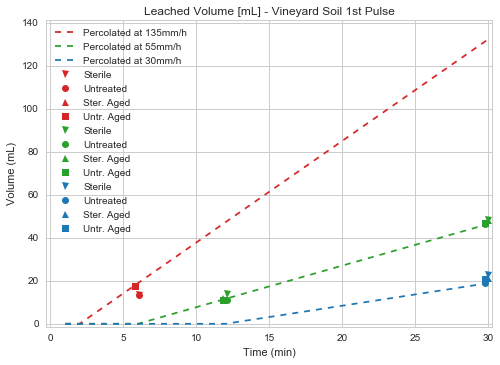

In [8]:
# Simulate hydrological data
water_data = leachsim(ovSat=ovSat_vine,
                      kSat=kSat_vine,
                      psi=psi_vine,
                      soil_height=soil_height1)

# Extract simulated hydrological variables 
# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmh = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_55mmh, time_size_30mmh]

""" Observed Hydrlogy Vineyard """
leach_high_6min = np.array([13.609, 13.610, 17.676, 17.705])  # all at 6 min
leach_med_12min = np.array([13.787, 11.112, 11.858, 11.294])  # all at 12 min
leach_med_30min = np.array([48.185, 46.402, 48.164, 47.032])  # all at 30min
leach_low_30min = np.array([22.595, 19.082, 21.285, 20.871])  # all at 30min

hydroplot(percol_data1, 
          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Vineyard Soil 1st Pulse")

### Hydrology - Annual Crop Soil (2nd pulse)

In [10]:
kSat_vine2 = kSat_vine/100 
ov_2 = 0.40  # Initial water content m3. m-3
soil_height2 = 23  # mm

In [12]:
water_data2 = leachsim(dtGA = 1,
                       ov=ov_2,
                       ovSat=ovSat_vine,
                       kSat=kSat_vine2,
                       psi=psi_vine,
                       soil_height=soil_height2)

G&A ponding during time step, with tp size: 0.32252092683488187 at t= 1.0
Mass balance 0.0
G&A ponding during time step, with tp size: 0.9665773378046572 at t= 2.0
Mass balance 5.093170329928398e-11
G&A ponding during time step, with tp size: 0.8472487784151248 at t= 7.0
Mass balance -3.637978807091713e-12


**Extract hydrological time-series (volumes are in $mm^3$)**

In [13]:
# Time axis
cum_time_30min = water_data2[:, 0]

# Cumulative infiltration
cum_inf_135mmh = water_data2[:, 4]
cum_inf_55mmh = water_data2[:, 5]
cum_inf_30mmh = water_data2[:, 6]

# Cumulative leachate
cum_leach_135mmh = water_data2[:, 7]
cum_leach_55mmh = water_data2[:, 8]
cum_leach_30mmh = water_data2[:, 9]

# Ponding
roff_135mmh = water_data2[:, 10]
roff_55mmh = water_data2[:, 11]
roff_30mmh = water_data2[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data2[:, 13]
cum_roff_55mmh = water_data2[:, 14]
cum_roff_30mmh = water_data2[:, 15]

# Infiltration
infil_135mmh = water_data2[:, 16]
infil_55mmh = water_data2[:, 17]
infil_30mmh = water_data2[:, 18]

# Group each compartment for graphing
percol_data2 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data2 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)


infil_data2 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data2[:, 19]
time_size_55mmh = water_data2[:, 20]
time_size_30mmh = water_data2[:, 21]

time_sizes2 = [time_size_135mmh, time_size_55mmh, time_size_30mmh]

### Percolation Crop (2nd pulse)

**Observed Percolation Vine Crop - 2nd pulse**

In [16]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([13.309, 0., 7.394, 6.549]) 

# At 12 min, med intensity
leach_med_12min = np.array([0.958, 3.669, 16.06, 12.988]) 

# At 30min, med intensity
leach_med_30min = np.array([0.941, 18.601, 51.834, 29.232])  

# At 30min, low intensity
leach_low_30min = np.array([10.157, 26.737, 27.533, 6.197]) 

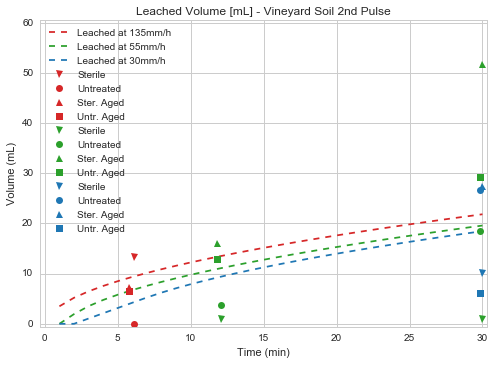

In [17]:
hydroplot(percol_data2, 
          "Leached at 135mm/h", "Leached at 55mm/h", "Leached at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Vineyard Soil 2nd Pulse")

### Ponding Crop (2nd pulse only)

**Observed Ponding Vineyard Crop - 2nd pulse**

In [18]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([8.991, 26.633, 15.720, 19.350])  

# all at 12 min, med intensity
roff_med_12min = np.array([21.193, 17.731, 0.756, 8.025]) 

# all at 30min, med intensity
roff_med_30min = np.array([54.633, 39.350, 0., 23.688])  

# all at 30min, low intensity
roff_low_30min = np.array([13.973, 3.717, 0., 22.827])  

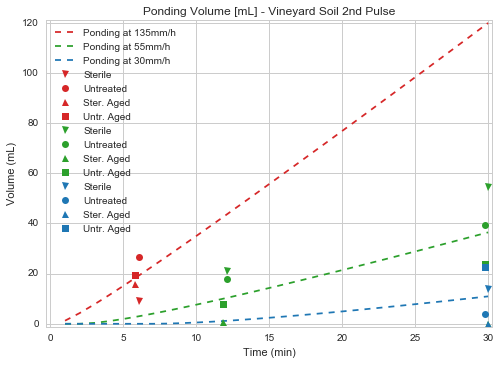

In [19]:
# Plot ponding simulations from second pulse.
hydroplot(runoff_data2, 
          "Ponding at 135mm/h", "Ponding at 55mm/h", "Ponding at 30mm/h",
          roff_high_6min, 
          roff_med_12min, roff_med_30min, 
          roff_low_30min,
         "Ponding Volume [mL] - Vineyard Soil 2nd Pulse")

# Contaminants - Vineyard Soil

In [20]:
from pestmob import *
from mixinglayer import *

### Metalaxyl properties

In [44]:
# Pesticide Koc 
Koc_mexyl = [163.0, 50.0, 30]  # [(a) , (b), (c)] [ml/g] , # 
Koc_mexyl = np.array(Koc_mexyl)*10**3  # [mm3/g]

# Kd (a) - NPIC @ http://npic.orst.edu/ingred/ppdmove.htm
Kd_mexylA_vine_sterile = Koc_mexyl[0]*foc_vine_sterile  
Kd_mexylA_vine_untreat = Koc_mexyl[0]*foc_vine_untreat

# Kd (b) - PAN @ http://www.pesticideinfo.org/
Kd_mexylB_vine_sterile = Koc_mexyl[1]*foc_vine_sterile  
Kd_mexylB_vine_untreat = Koc_mexyl[1]*foc_vine_untreat

# Kd (c) - https://toxnet.nlm.nih.gov/cgi-bin/sis/search/a?dbs+hsdb:@term+@DOCNO+7061
Kd_mexylC_vine_sterile = Koc_mexyl[2]*foc_vine_sterile  
Kd_mexylC_vine_untreat = Koc_mexyl[2]*foc_vine_untreat

Kd_mexyl = [Kd_mexylA_vine_sterile, Kd_mexylA_vine_untreat, 
            Kd_mexylB_vine_sterile, Kd_mexylB_vine_untreat,
            Kd_mexylC_vine_sterile, Kd_mexylC_vine_untreat]

In [50]:
for i in Kd_mexyl:
    print(log10(i))

3.523390303354718
3.4424832183210046
3.0101727032867784
2.9292656182530656
2.7883239536704223
2.707416868636709


### Metalaxyl - Vineyard Soil (1st pulse)

** Initial mass in leachate - Vineyard Soil, 1st Pulse**

In [46]:
# Initial mass
mx_ini_sterile = (2105.8+1504.9) / float(2) 
mx_ini_untreated = (1741.7+1696.7) / float(2) 

mx_ini = [mx_ini_sterile, mx_ini_untreated]

** Average observed mass in leachate - Vine Soil, 1st Pulse**

In [47]:
#################
# 1st Pulse
#################
# Leached Metalaxyl (Observed) - Vine
# 6min, 12min, 30min, 30min @ 135, 55, 55, 30mm/h
# 0d, 10d
mx_obs_sterile_lch1 = np.array([(307.0+269.5)/2.0,
                                (279.2+294.9)/2.0, (313.8+529.8)/2.0,
                                (419.4+346.1)/2.0])  # high, med-12, med-30, low
mx_obs_untreat_lch1 = np.array([(271.3+116.9)/2.0,
                                (304.3+276.9)/2.0, (616.4+409.1)/2.0,
                                (365.0+429.5)/2.0])

mx_sol_leach1 = [mx_obs_sterile_lch1, mx_obs_untreat_lch1]

# Ponded Metalaxyl ( Observed) - Vine
# high, med-12, med-30, low
mx_obs_sterile_vine_roff = np.array([0., 0., 0., 0.])

mx_obs_untreat_vine_roff = np.array([0., 0., 0., 0.])

mx_sol_pond1 = [mx_obs_sterile_vine_roff, mx_obs_untreat_vine_roff]

#################
# 2nd Pulse
#################
# Observed Metalaxyl Leached - Vine
# high-6, med-12, med-30, low-30
# 0d, 10d
mx_obs_sterile_lch2 = np.array([(63.8+100.4)/2.,
                               142.3, 163.8,
                               (130.5+222.)/2.])
mx_obs_untreat_lch2 = np.array([83.7,
                               115.4, 92.4,
                               (241.+15.3)/2.])

mx_sol_leach2 = [mx_obs_sterile_lch2, mx_obs_untreat_lch2]

# Observed Metalaxyl in Ponding - Vine
# high-6, med-12, med-30, low-30
# 0d, 10d
mx_obs_sterile_vine_roff2 = np.array([(8.+6.9)/2. , 
                                      18.8, 16.8,
                                     9.9])

mx_obs_untreat_vine_roff2 = np.array([(13.2+7.5)/2., 
                                      (10+7.1)/2., (3.6+3.8)/2.,
                                     (0.2+4.4)/2.])

mx_sol_pond2 = [mx_obs_sterile_vine_roff2, mx_obs_untreat_vine_roff2]


** Detailed observed mass in leachate and ponding - Vine Soil, 1st and 2nd pulse ** 

In [48]:
# Organized by intensity:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
leach1_mx_high_6min = np.array([307., 271.3, 269.5, 116.9])
leach2_mx_high_6min = np.array([63.8, 0., 100.4, 83.7])


# all at 12 min, med intensity
leach1_mx_med_12min = np.array([279.2, 304.3, 294.9, 276.9])
leach2_mx_med_12min = np.array([0., 0., 142.3, 115.4])

# all at 30min, med intensity
leach1_mx_med_30min = np.array([313.8, 616.4, 529.8, 409.1])
leach2_mx_med_30min = np.array([0., 0., 163.8, 92.4])

# all at 30min, low intensity
leach1_mx_low_30min = np.array([419.4, 365.0, 346.1, 429.5])
leach2_mx_low_30min = np.array([130.5, 241.1, 222.0, 15.3])

# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity

pond2_mx_high_6min = np.array([8.0, 13.2, 6.9, 7.5])

# all at 12 min, med intensity
pond2_mx_med_12min = np.array([18.8, 10.0, 0., 7.1])

# all at 30min, med intensity
pond2_mx_med_30min = np.array([16.8, 3.6, 0., 3.8])

# all at 30min, low intensity
pond2_mx_low_30min = np.array([9.9, 0.2, 0., 4.4])

In [49]:
cum_mx_vine1 = pest_test(Kd_mexyl,
                              intensities,
                              pb_vine,
                              ovSat_vine,
                              percol_data1, runoff_data1, infil_data1, time_sizes1,
                              area, soil_height,
                              mx_ini,
                              mx_sol_leach1, mx_sol_pond1,
                              d, runoff_vel,
                              KFILM=True)

Best log Kd (sterile):  3.4424832183210046 ( Num:  2 ) 
 Error:  1.44870731487
Best log Kd (untreat):  3.4424832183210046 ( Num:  2 ) 
 Error:  0.526771739818


In [42]:

# Time axis
cum_time_30min = cum_mx_vine1[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_vine1[:, 1]
cum_mass_leach_st_55mmh = cum_mx_vine1[:, 2]
cum_mass_leach_st_30mmh = cum_mx_vine1[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_vine1[:, 4]
cum_mass_leach_un_55mmh = cum_mx_vine1[:, 5]
cum_mass_leach_un_30mmh = cum_mx_vine1[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_vine1[:, 7]
mass_leach_st_55mmh = cum_mx_vine1[:, 8]
mass_leach_st_30mmh = cum_mx_vine1[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_vine1[:, 10]
mass_leach_un_55mmh = cum_mx_vine1[:, 11]
mass_leach_un_30mmh = cum_mx_vine1[:, 12]

mass_percol1 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

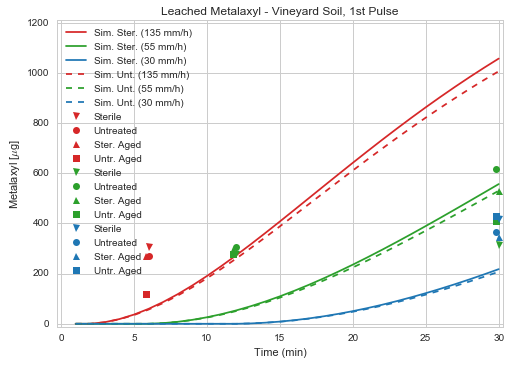

In [43]:
pestiplot_all(mass_percol1,
              leach1_mx_high_6min, leach1_mx_med_12min, leach1_mx_med_30min, leach1_mx_low_30min,
              'Leached Metalaxyl - Vineyard Soil, 1st Pulse',
              'Metalaxyl')

### Cupper, 2nd Pulse

In [52]:
cum_mx_vine2 = pest_test(Kd_mexyl,
                        intensities,
                        pb_vine,
                        ovSat_vine,
                        percol_data2, runoff_data2, infil_data2, time_sizes2,
                        area, soil_height,
                        mx_ini,
                        mx_sol_leach2, mx_sol_pond2,
                        d, runoff_vel,
                        KFILM=True)

Best log Kd (sterile):  3.523390303354718 ( Num:  1 ) 
 Error:  1.02899265501
Best log Kd (untreat):  3.523390303354718 ( Num:  1 ) 
 Error:  2.8225444886


In [54]:
# Time axis
cum_time_30min = cum_mx_vine2[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_vine2[:, 1]
cum_mass_leach_st_55mmh = cum_mx_vine2[:, 2]
cum_mass_leach_st_30mmh = cum_mx_vine2[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_vine2[:, 4]
cum_mass_leach_un_55mmh = cum_mx_vine2[:, 5]
cum_mass_leach_un_30mmh = cum_mx_vine2[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_vine2[:, 7]
mass_leach_st_55mmh = cum_mx_vine2[:, 8]
mass_leach_st_30mmh = cum_mx_vine2[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_vine2[:, 10]
mass_leach_un_55mmh = cum_mx_vine2[:, 11]
mass_leach_un_30mmh = cum_mx_vine2[:, 12]

mass_percol2 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

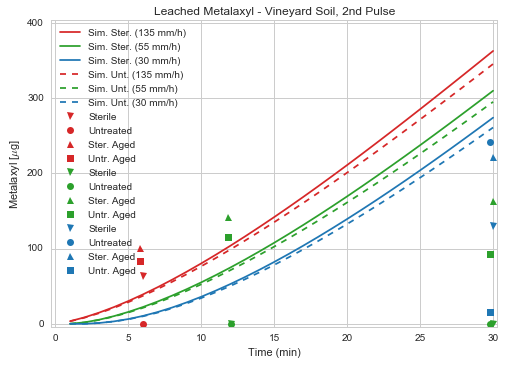

In [55]:
pestiplot_all(mass_percol2,
              leach2_mx_high_6min, leach2_mx_med_12min, leach2_mx_med_30min, leach2_mx_low_30min,
              'Leached Metalaxyl - Vineyard Soil, 2nd Pulse',
              'Metalaxyl')

** Ponding Mass **

In [56]:
# Ponded sterilized
mass_pond_st_135mmh = cum_mx_vine2[:, 13]
mass_pond_st_55mmh = cum_mx_vine2[:, 14]
mass_pond_st_30mmh = cum_mx_vine2[:, 15]

# Ponded untreated
mass_pond_un_135mmh = cum_mx_vine2[:, 16]
mass_pond_un_55mmh = cum_mx_vine2[:, 17]
mass_pond_un_30mmh = cum_mx_vine2[:, 18]

mass_pond2 = stackdata6(cum_time_30min,
        mass_pond_st_135mmh, mass_pond_st_55mmh, mass_pond_st_30mmh,
        mass_pond_un_135mmh, mass_pond_un_55mmh, mass_pond_un_30mmh)

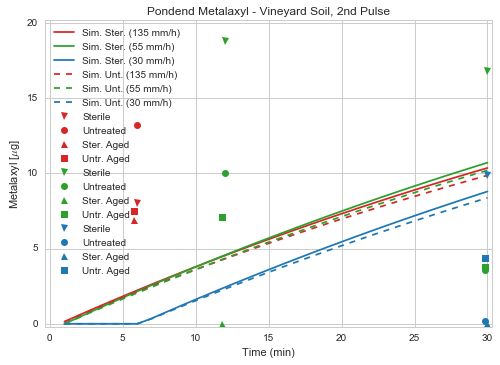

In [57]:
pestiplot_all(mass_pond2,
              pond2_mx_high_6min, pond2_mx_med_12min, pond2_mx_med_30min, pond2_mx_low_30min,
              'Pondend Metalaxyl - Vineyard Soil, 2nd Pulse',
              'Metalaxyl')

END NOTEBOOK

START NOTEBOOK

### S-metolachlor - Vineyard

In [13]:
# Initial mass
mr_ini_sterile = (7343.7+3052.6)/float(2) 
mr_ini_untreated = (4038.5+4904.5)/float(2) 

# Observed Metolachlor Output - Vine
mr_obs_sterile_vine = np.array([(148.5+111.5)/2.0,
                                (160.1+110.7)/2.0, (188.3+235.8)/2.0,
                                (237.4+142.8)/2.0])  # high, med-12, med-30, low
mr_obs_untreat_vine = np.array([(111.8+37.2)/2.0,
                                (111.3+79.3)/2.0, (278.4+156.1)/2.0,
                                (142.0+134.7)/2.0])

In [14]:
# Pesticide Koc 
Koc_smeto = 185.0  # [ml/g]

# Kd (S-metolachlor)
Kd_smeto_vine_sterile = Koc_smeto*foc_vine_sterile
Kd_smeto_vine_untreat = Koc_smeto*foc_vine_untreat

In [15]:
cum_mr_vine = pesti_ret(Kd_smeto_vine_sterile, Kd_smeto_vine_untreat,
                        pb_vine,
                        ovSat_vine,
                        water_data,
                        area, soil_height,
                        mr_ini_sterile, mr_ini_untreated)

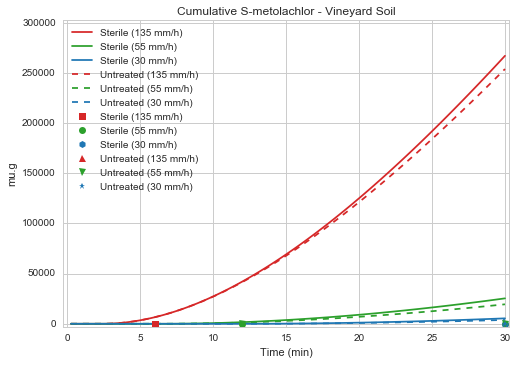

In [16]:
pestiplot(cum_mr_vine, mr_obs_sterile_vine, mr_obs_untreat_vine, 'Cumulative S-metolachlor - Vineyard Soil')

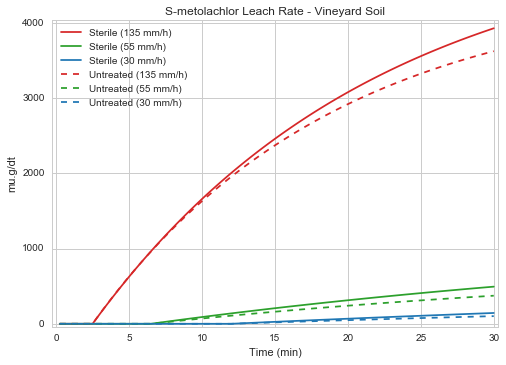

In [17]:
pestiplot_inst(cum_mr_vine, mr_obs_sterile_vine, mr_obs_untreat_vine, 'S-metolachlor Leach Rate - Vineyard Soil')

### Copper - Vineyard

In [18]:
# Initial mass
cu_ini_sterile = (3735 + 4008) / float(2) 
cu_ini_untreated = (4011 + 3860) / float(2) 

# Observed Cupper Output - Vine
# Intensitites: high, med, med, low
cu_obs_sterile_vine = np.array([(23.4+38.5)/2.0,
                                (28.3+29.7)/2.0, (611.1+588.5)/2.0,
                                (48.4+51.8)/2.0])  
cu_obs_untreat_vine = np.array([(1.4+0.6)/2.0,
                                (1.0+0.4)/2.0, (47.3+33.3)/2.0,
                                (2.7+0.8)/2.0])

In [19]:
# Kd (Copper). Allison and Allison, 2005 - EPA/600/R-05/074: 
# log(Kd) range: 0.1 - 7.0, max-mean = 5.5
Kd_copper_sterile = 10**2.7  # [mL/g] = [L/Kg] 
Kd_copper_untreat = 10**3.6  # [mL/g] = [L/Kg] 

In [20]:
cum_copper_vine = pesti_ret(Kd_copper_sterile, Kd_copper_untreat,
                            pb_vine,
                            ovSat_vine,
                            water_data,
                            area, soil_height,
                            cu_ini_sterile, cu_ini_untreated)

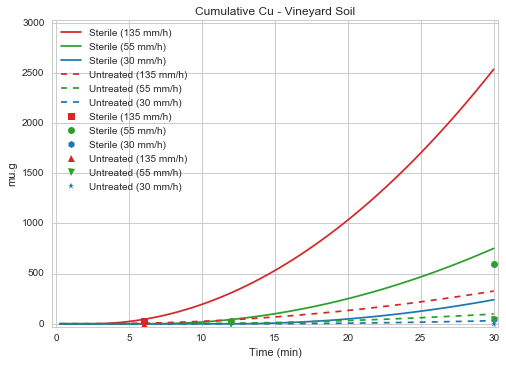

In [21]:
pestiplot(cum_copper_vine, cu_obs_sterile_vine, cu_obs_untreat_vine, 'Cumulative Cu - Vineyard Soil')

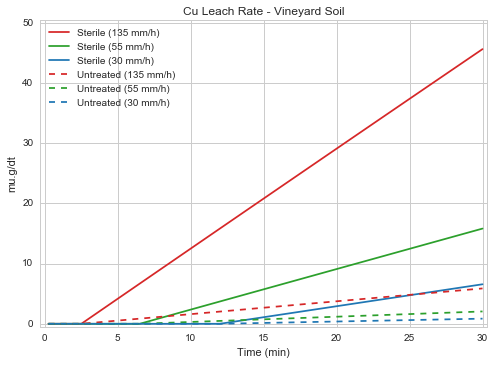

In [22]:
pestiplot_inst(cum_copper_vine, cu_obs_sterile_vine, cu_obs_untreat_vine, 'Cu Leach Rate - Vineyard Soil')

### Zinc - Vineyard

In [23]:
# Initial mass
zn_ini_sterile = (2811 + 3122) / float(2) 
zn_ini_untreated = (3216 + 3031) / float(2)  

# Observed Zinc Output - Vine
zn_obs_sterile_vine = np.array([(0.6+2.4)/2.0,
                                (0.8+0)/2.0, (24.2+4.3)/2.0,
                                (1.8+0)/2.0])  # high, med-12, med-30, low
zn_obs_untreat_vine = np.array([0,
                                0, (0.5+10.0)/2.0,
                                0])

In [24]:
# Kd (Zinc) Allison and Allison, 2005 - EPA/600/R-05/074:  log(Kd) range: 1.5 - 6.9
Kd_zinc_sterile = 10**2.9  # [mL/g] = [L/Kg] 
Kd_zinc_untreat = 10**3.9  # [mL/g] = [L/Kg] 

In [25]:
cum_zinc_vine = pesti_ret(Kd_copper_sterile, Kd_copper_untreat,
                          pb_vine,
                          ovSat_vine,
                          water_data,
                          area, soil_height,
                          zn_ini_sterile, zn_ini_untreated)

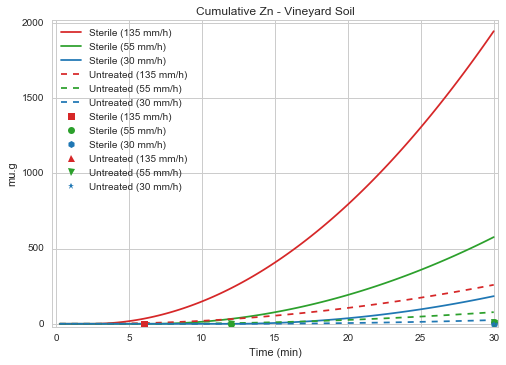

In [26]:
pestiplot(cum_zinc_vine, zn_obs_sterile_vine, zn_obs_untreat_vine, 'Cumulative Zn - Vineyard Soil')

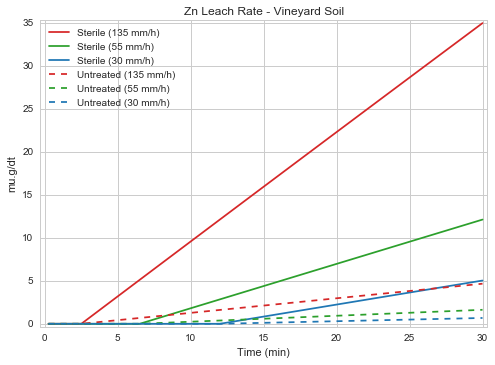

In [27]:
pestiplot_inst(cum_zinc_vine, zn_obs_sterile_vine, zn_obs_untreat_vine, 'Zn Leach Rate - Vineyard Soil')